# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
# import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# # load relabeled_weighted_avg.pkl
# import pickle
# with open(data_dir + '/relabeled_weighted_avg.pkl', 'rb') as f:
#     relabeled_weighted_avg = pickle.load(f)

# Load the weighted average from the ensemble data

In [2]:
# read the all_weighted_avg_curves
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

# Calculate the warming rate between 20900 to 18000

In [3]:
import numpy as np
from scipy import stats


# Age vector for the independent variable in the linear regression
age_vector = np.array([18100., 18300., 18500., 18700., 18900., 19100., 19300., 19500.,
                       19700., 19900., 20100., 20300., 20500., 20700., 20900.], dtype=float)


weighted_avg_curves_k0 = [curves[0] for curves in all_weighted_avg_curves if 0 in curves]
weighted_avg_curves_k0_median=np.median(weighted_avg_curves_k0,axis=0)
weighted_avg_curves_k0_median = weighted_avg_curves_k0_median[35:50]

slope_k0, intercept, r_value, p_value_k0, std_err = stats.linregress(age_vector/-1000, weighted_avg_curves_k0_median)

print('slope = {:.2f}'.format(slope_k0))
print('p_value = {:.5f}'.format(p_value_k0))

# Initialize a list to store the slopes
slopes = []
p_values=[]

# Loop through the data and calculate the slopes
for array in weighted_avg_curves_k0:
    temp_data = array[35:50]

    # Check if the length of temp_data matches the age_vector
    if len(temp_data) == len(age_vector):
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(age_vector, temp_data)
        slopes.append(slope)
        p_values.append(p_value)

# slope need to times 1000
slopes = np.array(slopes) * -1000
# Calculate the mean slope and the 95% confidence interval
mean_slope = np.mean(slopes)
std_error = np.std(slopes, ddof=1) / np.sqrt(len(slopes))
confidence_interval = stats.norm.interval(0.95, loc=mean_slope, scale=std_error)


print('95% confidence interval of slope = {:.2f} to {:.2f}'.format(confidence_interval[0], confidence_interval[1]))


slope = 0.29
p_value = 0.00000
95% confidence interval of slope = 0.27 to 0.31


\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
age_5th=20500, age_95th=21900
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 41. 49.]
selected_cp_index: 2
age_5th=16500, age_95th=17700
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [14. 30. 35. 51.]
selected_cp_index: 2
age_5th=16500, age_95th=17500
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 26. 35.]
selected_cp_index: 2
age_5th=16500, age_95th=17500


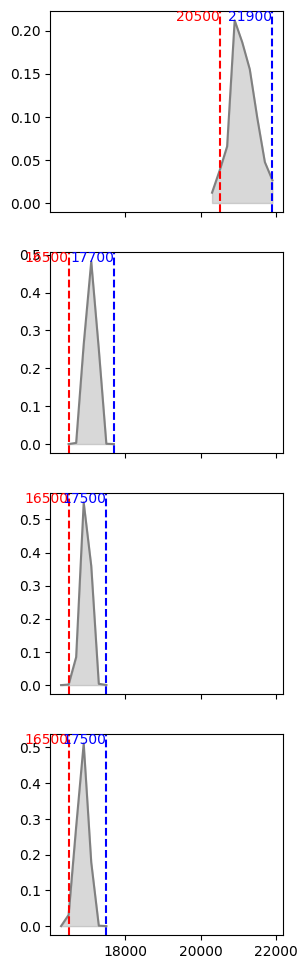

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
from matplotlib.colors import ListedColormap

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(3, 12),dpi=100,sharex=True)
# cmap = plt.get_cmap('Accent', 4)


left_width_all=[800,800,800,800]
right_width_all=[1100,800,800,800]


for i in range(4):


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']

    left_width=left_width_all[i]
    right_width=right_width_all[i]
    t_cutoff_left=cp_age-left_width
    t_cutoff_right=cp_age+right_width


    age_subset = age[(age > t_cutoff_left) & (age < t_cutoff_right)]
    cpOccPr_subset = cpOccPr[(age > t_cutoff_left) & (age < t_cutoff_right)]

    # # Get the current axis
    # ax= axs[i]
    # ax.plot(age_subset, cpOccPr_subset, 'grey', label='cpOccPr')
    # # fill the area bewteen cpOccPr_subset and max ylim with light purple
    # ax.fill_between(age_subset, cpOccPr_subset, 0, color='grey', alpha=0.3)
    # # invert x axis
    # ax.invert_xaxis()

    p_5th=np.percentile(cpOccPr_subset, 5)
    # find the first age where the cpOccPr_subset is less than 5th percentile
    age_5th=age_subset[cpOccPr_subset>=p_5th][0]
    # find the last age where the cpOccPr_subset is less than 5th percentile
    age_95th=age_subset[cpOccPr_subset>=p_5th][-1]

    ax = axs[i]
    ax.plot(age_subset, cpOccPr_subset, 'grey', label='cpOccPr')
    ax.fill_between(age_subset, cpOccPr_subset, 0, color='grey', alpha=0.3)
    ax.invert_xaxis()

    # Label the 5% and 95% quantile points on the plot
    ax.axvline(x=age_5th, color='r', linestyle='--', label='5% Quantile')
    ax.axvline(x=age_95th, color='b', linestyle='--', label='95% Quantile')
    ax.text(age_5th, ax.get_ylim()[1]*0.95, f'{age_5th:.0f}', color='r', horizontalalignment='right')
    ax.text(age_95th, ax.get_ylim()[1]*0.95, f'{age_95th:.0f}', color='b', horizontalalignment='right')
    print(f'age_5th={age_5th:.0f}, age_95th={age_95th:.0f}')
    


In [16]:
cpOccPr_subset>=p_5th

array([False,  True,  True,  True,  True,  True,  True])

In [5]:
ds_sat

<xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 ...
    class_relabeled        (lat, lon) int32 ...

In [8]:
all_arrays.shape

AttributeError: 'list' object has no attribute 'shape'

\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 35
cps [ 7. 36. 47.]
selected_cp_index: 1


ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

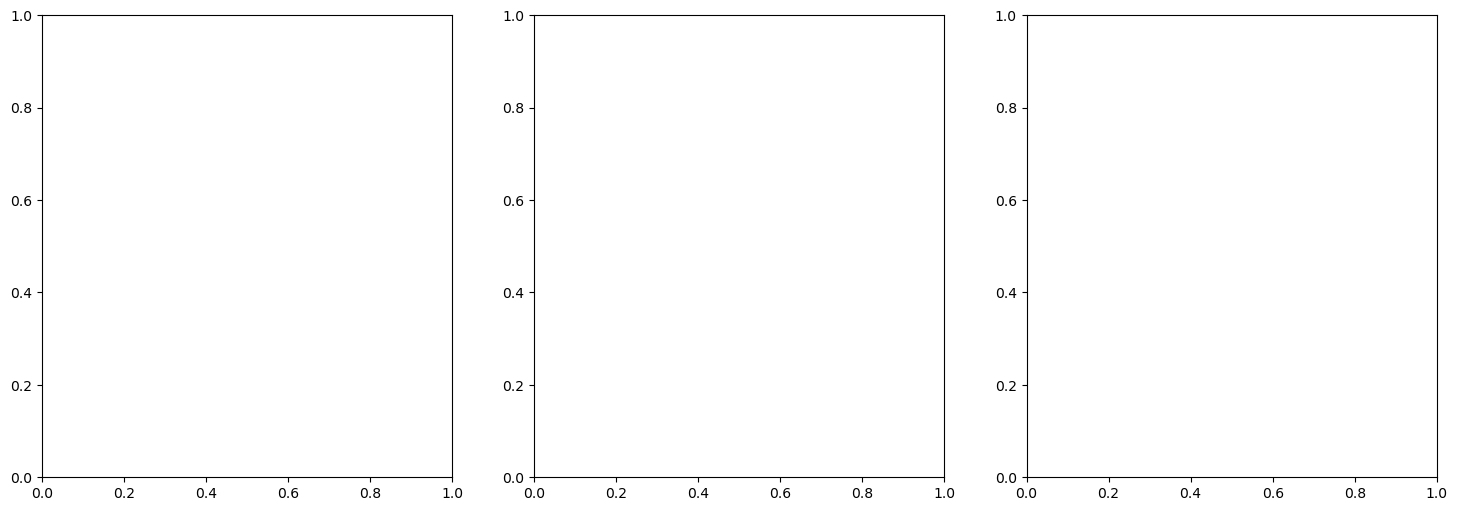

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf



all_arrays = [entry[0] for entry in all_weighted_avg_curves]  # list comprehension to collect all arrays

# Creating a figure with 1 row and 3 columns
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Increase width to better fit three subplots

# Loop through all arrays
for array in all_arrays:
    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(array, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    
    # Plot all arrays in the first subplot
    ax[0].plot(ds_sat['age'], array, alpha=0.5)  # using alpha for better visibility if lines overlap
    ax[1].plot(age, cpOccPr, 'r-')  # Red line for visibility
    ax[2].plot(age, slpSgnPosPr, 'b-')  # Blue line for visibility

# Adding labels and titles to the first subplot
ax[0].set_title('All Time Series')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Values')

# Only plot the last iteration's 'cpOccPr' and 'slpSgnPosPr' to avoid overlapping and cluttering
# Plotting cpOccPr in the middle subplot

ax[1].set_title('Change Point Occurrence Probability')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('cpOccPr')

# Plotting slpSgnPosPr in the third subplot
ax[2].set_title('Slope Sign Positive Probability')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('slpSgnPosPr')

# Display the plot
plt.tight_layout()
plt.show()


In [15]:
import numpy as np
from toolbox import change_point_functions as cpf

all_arrays = [entry[0] for entry in all_weighted_avg_curves]  # list comprehension to collect all arrays

# Initialize lists to store all cpOccPr and slpSgnPosPr data
all_cpOccPr = []
all_slpSgnPosPr = []

# Loop through all arrays
for array in all_arrays:
    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(array, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    
    # Append to list
    all_cpOccPr.append(cpOccPr)
    all_slpSgnPosPr.append(slpSgnPosPr)
    

# Calculate the mean of cpOccPr and slpSgnPosPr across all arrays
mean_cpOccPr = np.mean(all_cpOccPr, axis=0)
mean_slpSgnPosPr = np.mean(all_slpSgnPosPr, axis=0)



|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 35
cps [ 7. 36. 47.]
selected_cp_index: 1


ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

NameError: name 'mean_cpOccPr' is not defined

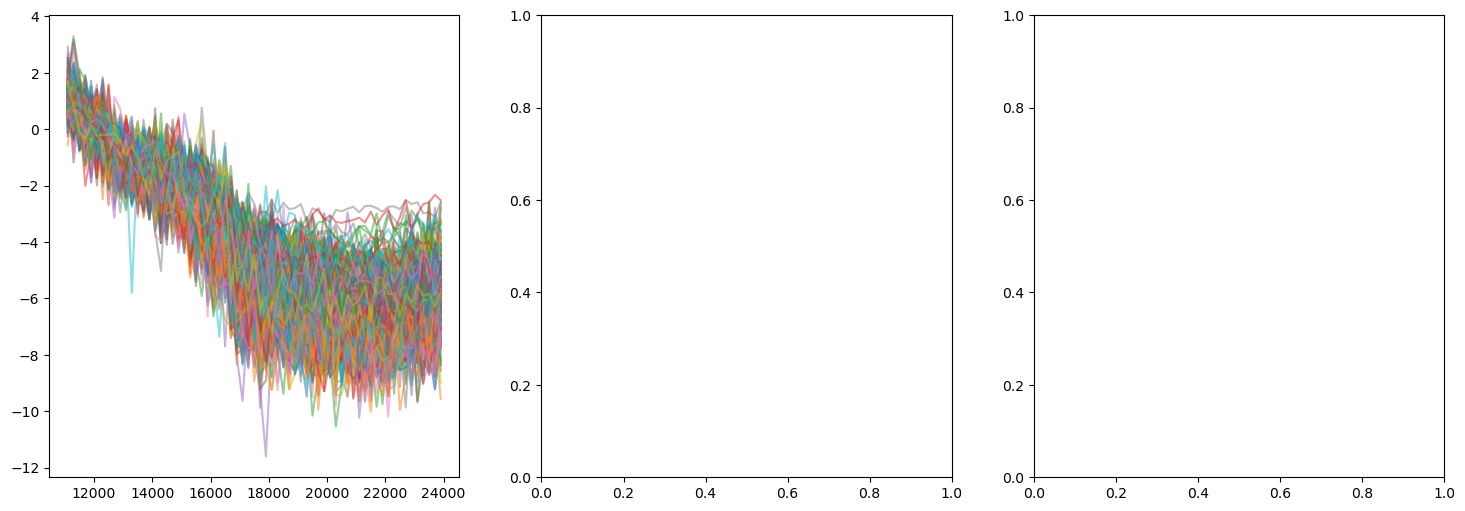

In [14]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # Increase width to better fit three subplots


# Loop through all arrays
for array in all_arrays:

    # Plot all arrays in the first subplot
    ax[0].plot(ds_sat['age'], array, alpha=0.5)  # using alpha for better visibility if lines overlap




# Find peaks in mean_cpOccPr
peaks, _ = find_peaks(mean_cpOccPr)

# Plot the weighted average curves
ax[1].plot(age, mean_cpOccPr, 'r-')  # Plotting the mean cpOccPr
for peak in peaks:
    ax[1].axvline(x=age[peak], color='k', linestyle='--')  # Plot vertical lines at the peaks


ax[2].fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
ax[2].fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

# Adding labels and titles to subplots
ax[0].set_title('All Time Series')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Values')

ax[1].set_title('Average Change Point Occurrence Probability')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Average cpOccPr')

ax[2].set_title('Average Slope Sign Positive Probability')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Average slpSgnPosPr')

# Display the plot
plt.tight_layout()
plt.show()

In [15]:
len(all_weighted_avg_curves)

500

In [17]:
type(all_weighted_avg_curves[0])

dict

In [18]:
all_weighted_avg_curves[0]

{0: array([ 1.007988  ,  0.97654605,  0.7856106 ,  0.160984  , -0.601501  ,
         0.02251715,  0.07577149, -0.7088386 , -0.7557536 , -0.197704  ,
        -0.7656306 , -1.7184539 , -0.9327239 , -1.773591  , -1.2275153 ,
        -1.0274941 , -1.8114095 , -1.2403514 , -2.2028494 , -1.4900194 ,
        -1.7824625 , -2.3625512 , -2.5196624 , -3.3518472 , -3.1146607 ,
        -3.2483716 , -2.6280234 , -3.9913769 , -3.7495334 , -4.656912  ,
        -4.207358  , -4.562905  , -5.1181173 , -4.959944  , -4.9050484 ,
        -4.718248  , -4.8677325 , -4.3639197 , -5.1015434 , -4.966917  ,
        -4.6905994 , -5.088085  , -5.106036  , -5.115935  , -4.9057655 ,
        -4.9750996 , -5.6022677 , -5.197532  , -5.0961933 , -4.056648  ,
        -4.883547  , -4.931409  , -5.154696  , -5.198548  , -5.222568  ,
        -5.055896  , -4.940144  , -5.5348754 , -4.6635194 , -4.6893888 ,
        -4.058645  , -4.5641866 , -5.3905697 , -5.3564105 , -4.758965  ],
       dtype=float32),
 1: array([ 2.8866892 , 

\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 35
cps [ 7. 36. 47.]
selected_cp_index: 1
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 38
cps [13. 23. 28. 34. 39.]
selected_cp_index: 4
-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 35
cps [12. 19. 32. 36. 45.]
selected_cp_index: 3
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 27
cps [ 6. 19. 28. 37. 44.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 39
cps [ 7. 13. 17. 22. 35. 40.]
selected_cp_index: 5
/Progress:100.0% done[==================================

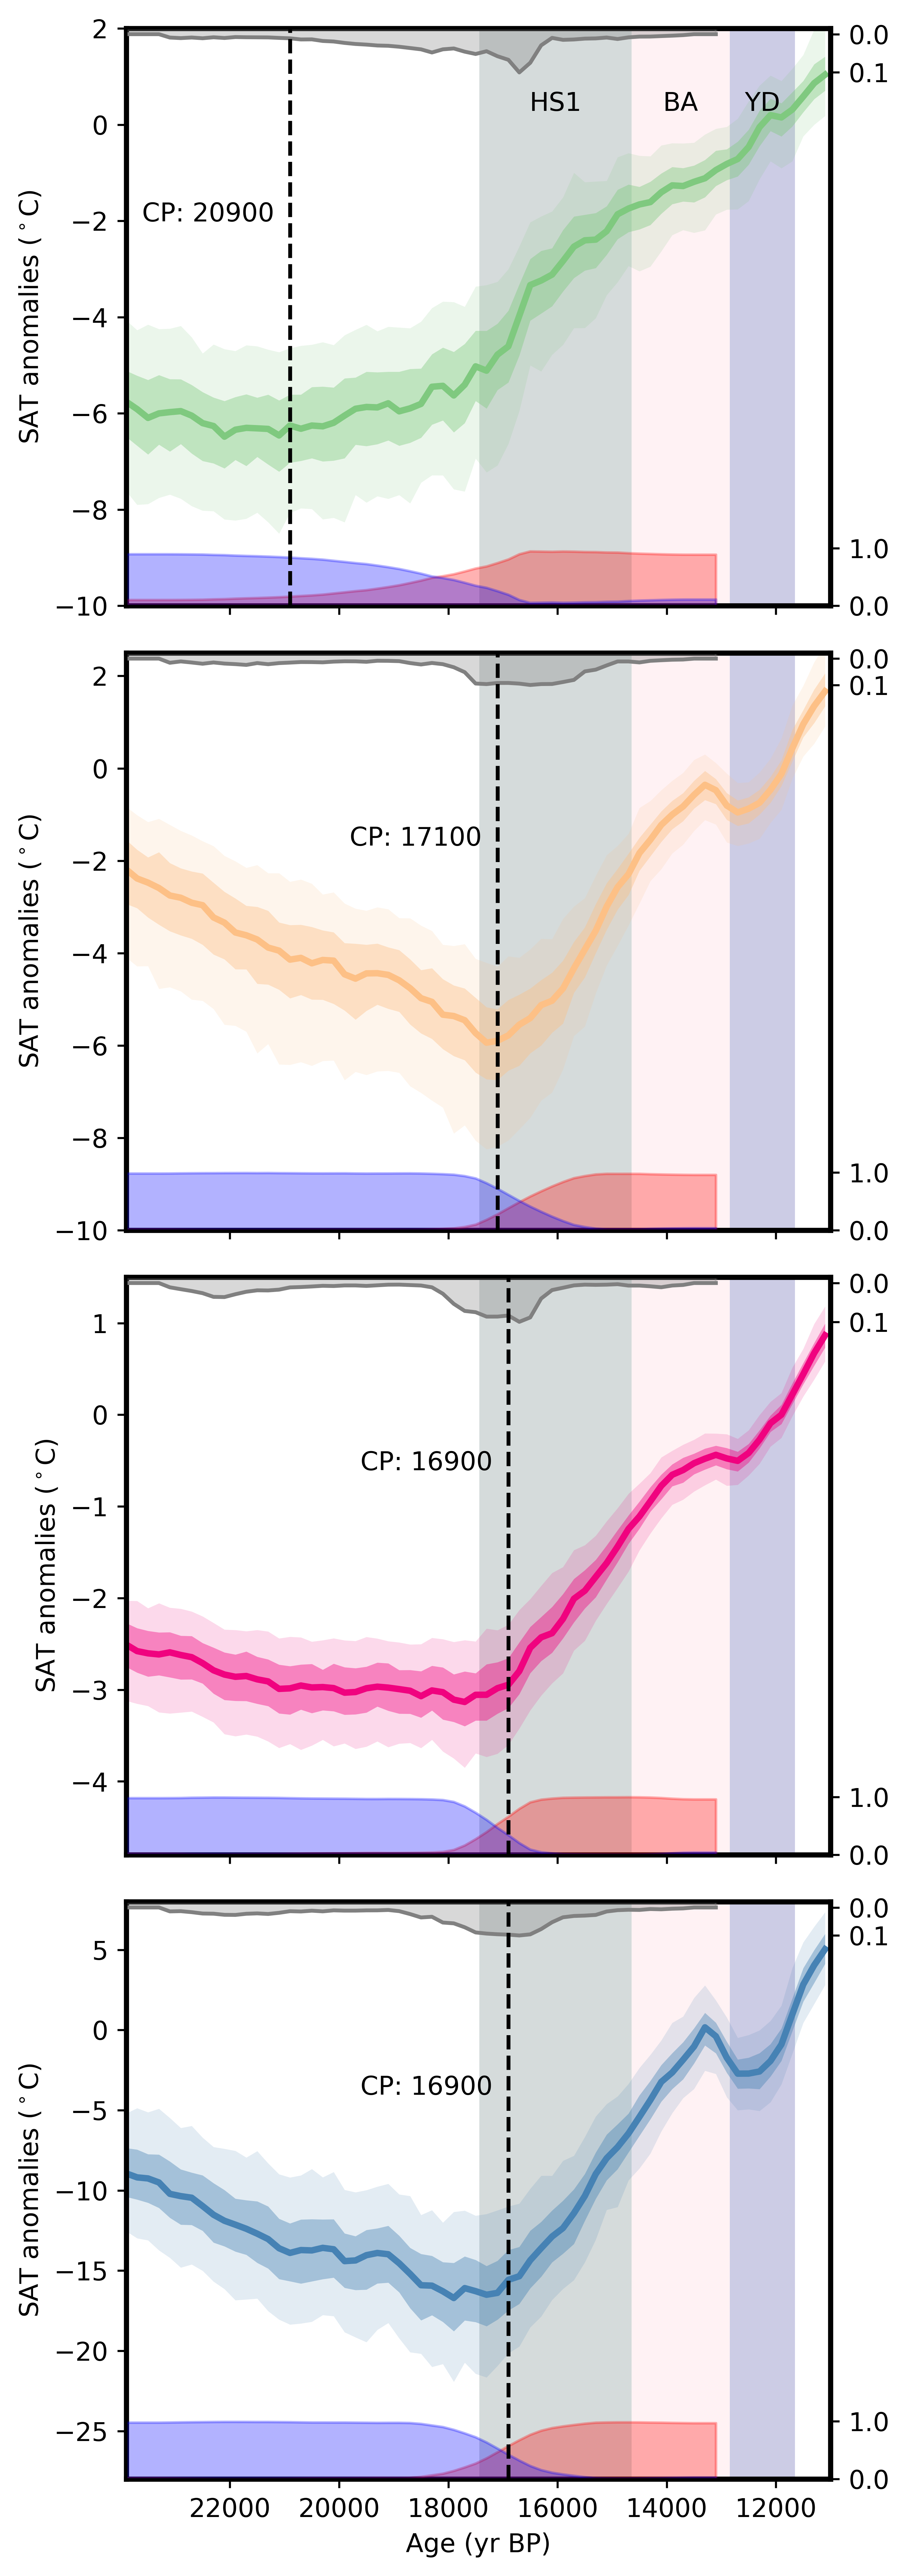

In [46]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap


# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 14),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-10,2],[-10,2.5],[-4.8,1.5],[-28,8]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_all=cp_info['cp_age_all']


    # calculate the cp_info for ensemble members
    # Initialize lists to store all cpOccPr and slpSgnPosPr data
    all_cpOccPr = []
    all_slpSgnPosPr = []

    # Loop through all arrays
    for array in weighted_avg_curves_k:
        # Calculate the cp_info for each dataset
        cp_info_ens = cpf.find_cp(array, ds_sat['age'], rb_plot=False)
        
        # Extract data for plotting from cp_info
        cpOccPr_ens = cp_info_ens['cpOccPr']
        slpSgnPosPr_ens = cp_info_ens['slpSgnPosPr']
        

        
        # Append to list
        all_cpOccPr.append(cpOccPr_ens)
        all_slpSgnPosPr.append(slpSgnPosPr_ens)
        

    # Calculate the mean of cpOccPr and slpSgnPosPr across all arrays
    mean_cpOccPr = np.mean(all_cpOccPr, axis=0)
    mean_slpSgnPosPr = np.mean(all_slpSgnPosPr, axis=0)




    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    if i==0:
        ax1.text(x=np.mean(HS1), y=0.35 * np.max(ax1.get_ylim()), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=0.35 * np.max(ax1.get_ylim()), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=0.35 * np.max(ax1.get_ylim()), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)
    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('SAT anomalies ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, mean_slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - mean_slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_mean_cpOccPr = (np.max(ylim)-mean_cpOccPr*5)-0.1
    ax2.plot(age, scaled_mean_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_mean_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_mean_cpOccPr),np.max(scaled_mean_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(mean_cpOccPr),1)), str(np.round(np.min(mean_cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age.values))
    ax2.text(x=cp_age.values+1500, y=0.7 * np.max(ax2.get_ylim()), s='CP: '+age_text, ha='center', va='top')


    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


In [57]:
all_weighted_avg_curves[0]

{0: array([ 1.007988  ,  0.97654605,  0.7856106 ,  0.160984  , -0.601501  ,
         0.02251715,  0.07577149, -0.7088386 , -0.7557536 , -0.197704  ,
        -0.7656306 , -1.7184539 , -0.9327239 , -1.773591  , -1.2275153 ,
        -1.0274941 , -1.8114095 , -1.2403514 , -2.2028494 , -1.4900194 ,
        -1.7824625 , -2.3625512 , -2.5196624 , -3.3518472 , -3.1146607 ,
        -3.2483716 , -2.6280234 , -3.9913769 , -3.7495334 , -4.656912  ,
        -4.207358  , -4.562905  , -5.1181173 , -4.959944  , -4.9050484 ,
        -4.718248  , -4.8677325 , -4.3639197 , -5.1015434 , -4.966917  ,
        -4.6905994 , -5.088085  , -5.106036  , -5.115935  , -4.9057655 ,
        -4.9750996 , -5.6022677 , -5.197532  , -5.0961933 , -4.056648  ,
        -4.883547  , -4.931409  , -5.154696  , -5.198548  , -5.222568  ,
        -5.055896  , -4.940144  , -5.5348754 , -4.6635194 , -4.6893888 ,
        -4.058645  , -4.5641866 , -5.3905697 , -5.3564105 , -4.758965  ],
       dtype=float32),
 1: array([ 2.8866892 , 

# Testing the CPCI


-Progress:100.0% done[==============================================================]
cpCI_cps_stack_sorted= [[ 9.365136 17.253307 15.      ]
 [27.175087 32.829933 30.      ]
 [35.364365 37.953423 37.      ]
 [39.117428 45.51937  41.      ]
 [50.15991  54.176075 52.      ]
 [54.555424 58.98144  58.      ]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]]
pospr_diff_max_index: 52
cps [15. 30. 37. 41. 52. 58.]
selected_cp_index: 4


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


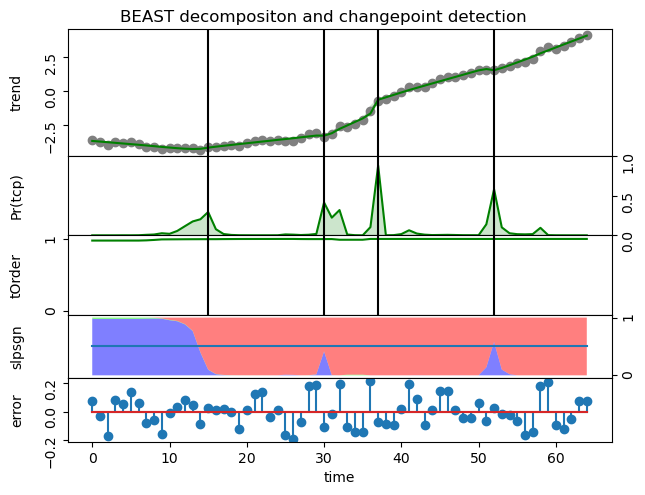

In [4]:
import numpy as np
import Rbeast as rb

weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]

data=np.median(weighted_avg_curves_k,axis=0)

# flip the data
data = data[::-1]

# start_age = ds_sat_EOFs['age'][-1].values
age=ds_sat['age'].values
start_age=age[-1]
# print(start_age)

o = rb.beast(data, start=0, season='none', options=0, quiet=1)

rb.plot(o)


cps = o.trend.cp


cpCI=o.trend.cpCI
cpCI_cps_stack=np.column_stack((cpCI,cps))
# sort the cpCI_cps_stack according to the last column in asending order
cpCI_cps_stack_sorted=cpCI_cps_stack[cpCI_cps_stack[:,1].argsort()]

print('cpCI_cps_stack_sorted=',cpCI_cps_stack_sorted)



# remove nan
cps = cps[~np.isnan(cps)]
cps = np.sort(cps)


pospr_diff_max_index=np.argmax(np.diff(o.trend.slpSgnPosPr))
print('pospr_diff_max_index:', pospr_diff_max_index)
print('cps', cps)

# find the closet cp to the pospr_diff_max_index
selected_cp_index = np.argmin(np.abs(cps-pospr_diff_max_index))
print('selected_cp_index:', selected_cp_index)

selected_cp_age=start_age - cps[selected_cp_index]*200
selected_cp_age_CI=start_age-cpCI_cps_stack_sorted[selected_cp_index]*200
# get the first two data in selected_cp_age_CI
selected_cp_age_CI=selected_cp_age_CI[:2]




# cpOccPr=o.trend.cpOccPr
# cpOccPr_at_cps=[cpOccPr[int(cp)] for cp in cps]
# # print the cpOccPr_at_cps
# print('cpOccPr_at_cps=',cpOccPr_at_cps)

# # put cpOccPr_at_cps and cps into a array with two columns
# cpOccPr_cps_stack=np.column_stack((cpOccPr_at_cps,cps))
# # in cpOccPr_cps_stack, sort the first column in descending order and change the order of the second column accordingly
# cpOccPr_cps_stack_sorted=cpOccPr_cps_stack[cpOccPr_cps_stack[:,0].argsort()[::-1]]
# # get the first 3 of the second column
# cps_top3=cpOccPr_cps_stack_sorted[:3,1]











# print('cps_top3=',cps_top3)

# print('ncp=',o.trend.ncp)
# print('cps=',cps)
# print('cpCI=',o.trend.cpCI)

In [5]:
cpCI

array([[35.364365, 37.953423],
       [27.175087, 32.829933],
       [50.15991 , 54.176075],
       [ 9.365136, 17.253307],
       [54.555424, 58.98144 ],
       [39.117428, 45.51937 ],
       [      nan,       nan],
       [      nan,       nan],
       [      nan,       nan],
       [      nan,       nan]], dtype=float32)

In [88]:
selected_cp_age_CI=start_age.values-cpCI_cps_stack_sorted[0]*200
selected_cp_age_CI

array([22338.592, 20172.312, 21100.   ], dtype=float32)

In [86]:
start_age

<xarray.DataArray 'age' ()>
array(23900., dtype=float32)
Coordinates:
    age      float32 2.39e+04
Attributes:
    long_name:  reconstruction bin mid-point (years BP)

In [83]:
selected_cp_index

0

In [80]:
23900-cpCI_cps_stack_sorted[1]*200

array([19657.984, 18353.611, 18900.   ], dtype=float32)

In [70]:
cpOccPr_cps

array([[5.9266675e-01, 3.7000000e+01],
       [2.4504170e-01, 3.2000000e+01],
       [1.9904169e-01, 1.5000000e+01],
       [2.8691670e-01, 5.1000000e+01],
       [5.3333338e-02, 2.5000000e+01],
       [2.0083334e-02, 5.8000000e+01],
       [2.1666668e-02, 4.5000000e+01],
       [2.3750000e-02, 4.1000000e+01]], dtype=float32)

In [72]:
cpOccPr_cps_stack_sorted

array([[5.5258340e-01, 3.7000000e+01],
       [2.6587504e-01, 5.1000000e+01],
       [2.2745836e-01, 3.2000000e+01],
       [1.8608336e-01, 1.5000000e+01],
       [5.7708334e-02, 2.5000000e+01],
       [2.1375000e-02, 5.5000000e+01],
       [1.8750001e-02, 4.5000000e+01],
       [1.8708335e-02, 4.1000000e+01]], dtype=float32)

In [61]:
o

Object of 9 field(s):

 time        : [65 float32] 
 data        : [65 float32] 
 marg_lik    : 46.0662 
 R2          : 0.998427 
 RMSE        : 0.0971755 
 sig2        : 0.0183774 
 trend       : [ 1 object with 20 fields] 
               ncp            : 3.62442 
               ncp_median     : 4 
               ncp_mode       : 4 
               ncp_pct90      : 4 
               ncp_pct10      : 2 
               ncpPr          : [11 float32] 
               cpOccPr        : [65 float32] 
               order          : [65 float32] 
               cp             : [10 float32] 
               cpPr           : [10 float32] 
               cpAbruptChange : [10 float32] 
               cpCI           : [10x2 float32] 
               Y              : [65 float32] 
               SD             : [65 float32] 
               CI             : [65x2 float32] 
               slp            : [65 float32] 
               slpSD          : [65 float32] 
               slpCI          : [65x2 

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 32. 37. 41.]
selected_cp_index: 0
age_CI_text: 21995-20436
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [15. 23. 33. 40. 48.]
selected_cp_index: 2
age_CI_text: 17648-16607
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 30. 34. 51.]
selected_cp_index: 3
age_CI_text: 17290-16649
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
age_CI_text: 17398-16506


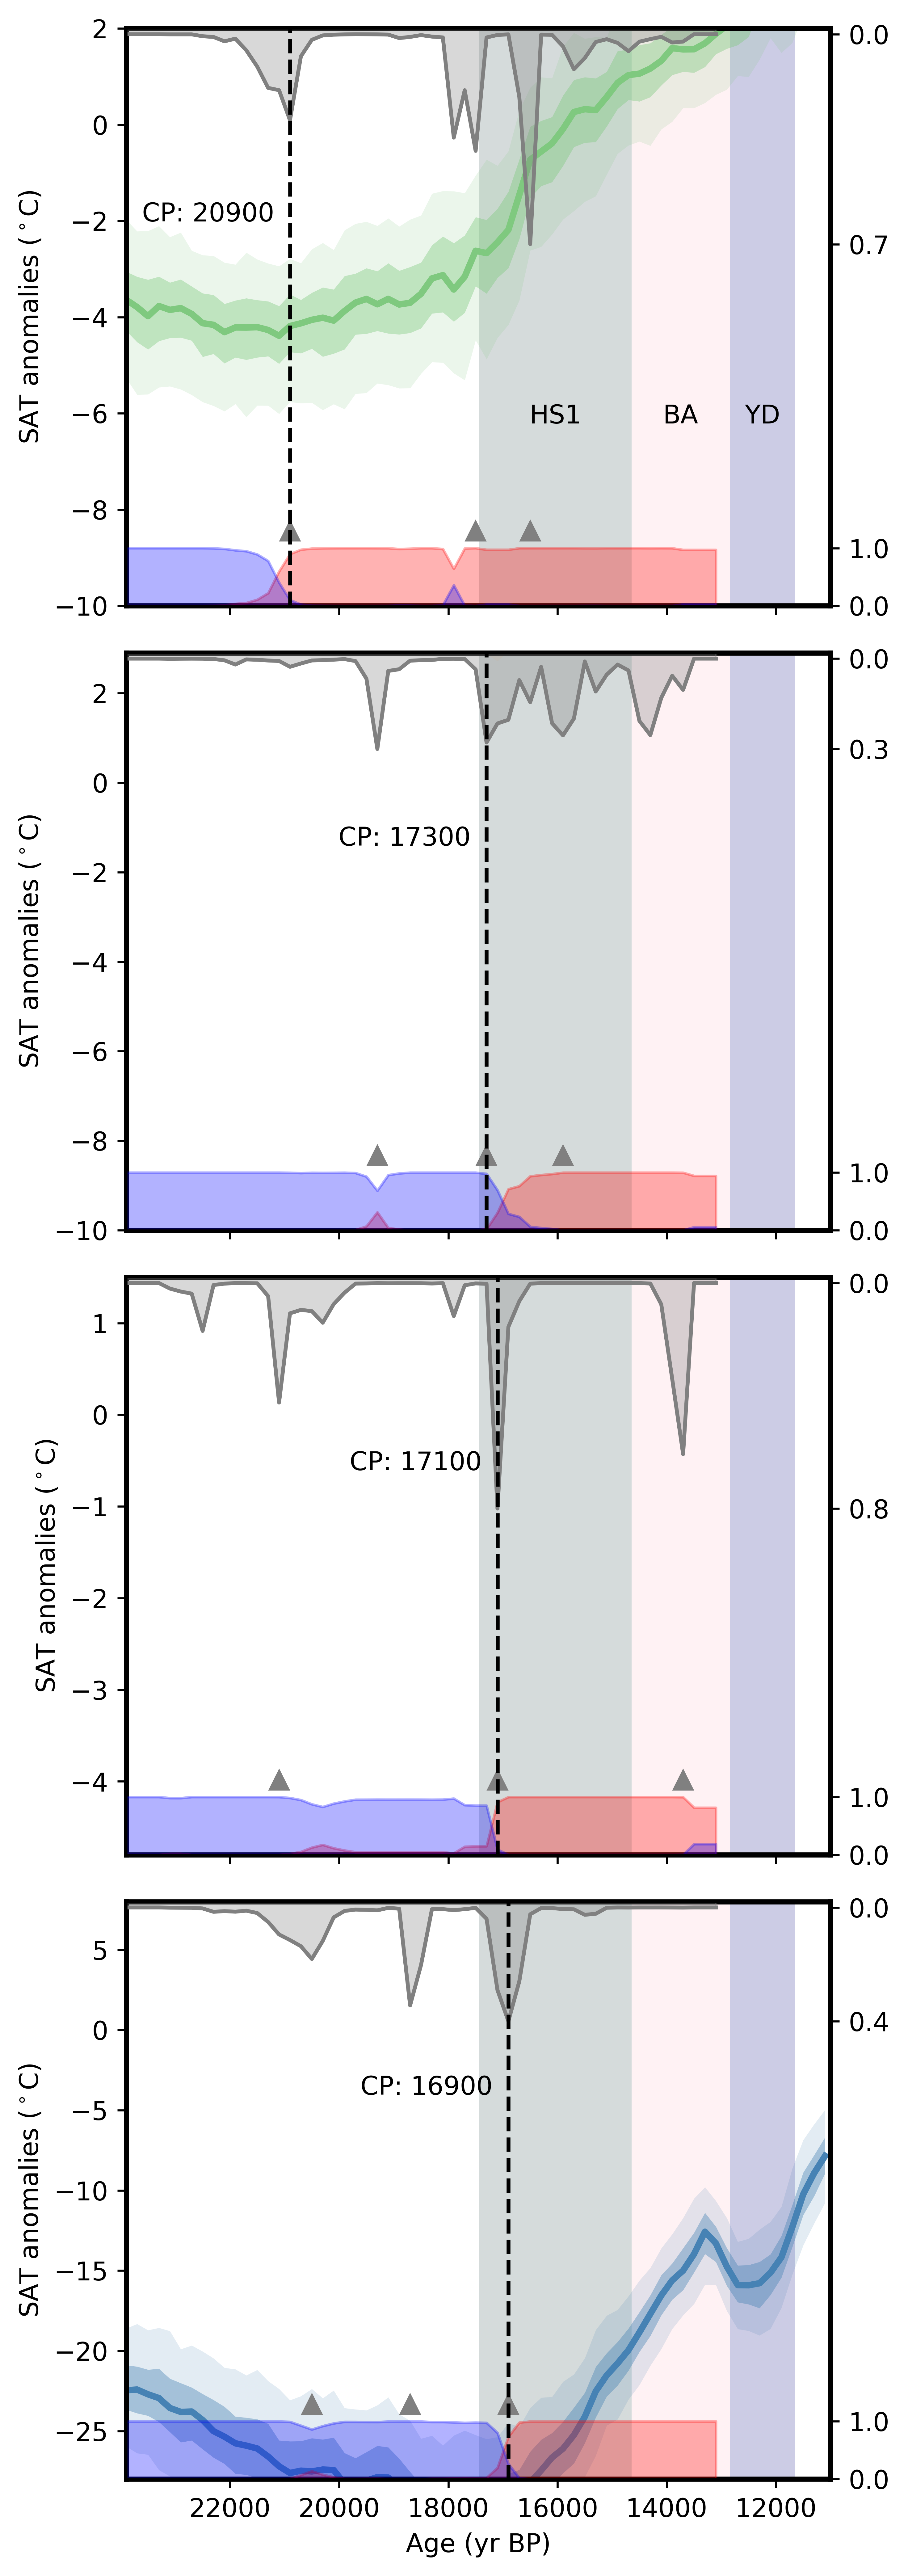

In [3]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap


# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 14),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-10,2],[-10,2.9],[-4.8,1.5],[-28,8]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.35 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.35 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.35 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)
    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('SAT anomalies ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='CP: '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('age_CI_text:',age_CI_text)


    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


# Randomly extract n samples

/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 14
cps [15. 30. 37. 41. 45.]
selected_cp_index: 0
age_CI_text: 21830-20564


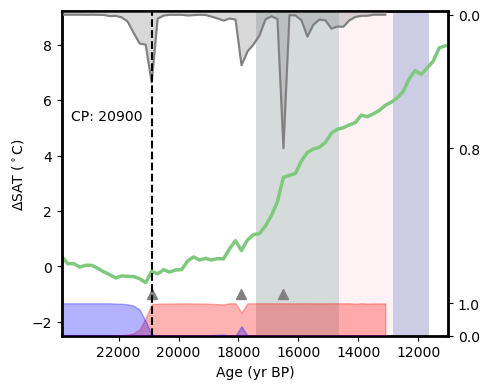

In [92]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap


# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(1, 1, figsize=(5, 4),dpi=100,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-2.5,9.2]]



# Get the current axis
ax1 = axs


weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


def calculate_sample_median(weighted_avg_curves_k, sample_size):
    if sample_size > len(weighted_avg_curves_k):
        raise ValueError("Sample size cannot exceed the number of available datasets")
    sample_indices = np.random.choice(range(len(weighted_avg_curves_k)), size=sample_size, replace=False)
    sample = [weighted_avg_curves_k[idx] for idx in sample_indices]
    sample_median = np.median(sample, axis=0)
    return sample_median


# Set sample size
sample_size = 200  # Define as needed
weighted_avg_curves_k_median = calculate_sample_median(weighted_avg_curves_k, sample_size)



# calculate the median of the weighted_avg_curves_k
# weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

# Calculate the cp_info for the median of each dataset
cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)

# Extract data for plotting from cp_info
# data_flipped = cp_info['data_flipped']
cpOccPr = cp_info['cpOccPr']
slpSgnPosPr = cp_info['slpSgnPosPr']
age = cp_info['age']
cp_age = cp_info['cp_age']
cp_age_CI=cp_info['cp_age_CI']
cp_age_all=cp_info['cp_age_all']






ax1.set_ylim(ylims[0])

# Plot grey bars for HS1, BA, and YD periods
ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


# plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
# ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

if i==0:
    ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
    ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
    ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')



ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(0),linewidth=2.5)

# # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
# LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
# ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)




ax1.set_xlabel('Age (yr BP)')
# set x-axis limits
ax1.set_xlim([11000,23900])


# invert the x-axis
ax1.invert_xaxis()
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')

ax1.spines['left'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)





# Create a twin axis
ax2 = ax1.twinx()
# set the y-axis limits
ax2.set_ylim([0, 10])
# get the ylim
ylim = ax2.get_ylim()



# fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
# ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
# ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



# Plot the probability of the change points
scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')

ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

# set y ticks
ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
#  set y tick labels
ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






# plot a vertical line at cp_age
ax2.axvline(x=cp_age, color='k', linestyle='--')
# add text to show the cp_age
age_text=str(int(cp_age))
ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='CP: '+age_text, ha='center', va='top')
# add text to show the cp_age_CI
age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
# ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
print('age_CI_text:',age_CI_text)



# Adjust layout
plt.tight_layout()

# Display the figure
plt.show()


# Add TraCE data

# Load TraCE data

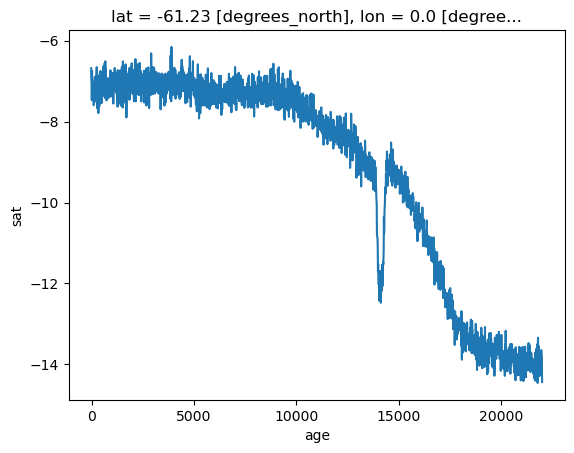

In [3]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


In [4]:
# read the TraCE_weighted_avg_LGMR_mask.pkl
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_weighted_avg_LGMR_mask = pickle.load(f)

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 30. 37. 45.]
selected_cp_index: 0
age_CI_text: 21893-20423
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [14. 23. 33. 40. 48.]
selected_cp_index: 2
age_CI_text: 17580-16743
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 33
cps [ 7. 14. 34. 51.]
selected_cp_index: 2
age_CI_text: 17460-16650
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [17. 26. 35. 42.]
selected_cp_index: 2
age_CI_text: 17317-16511


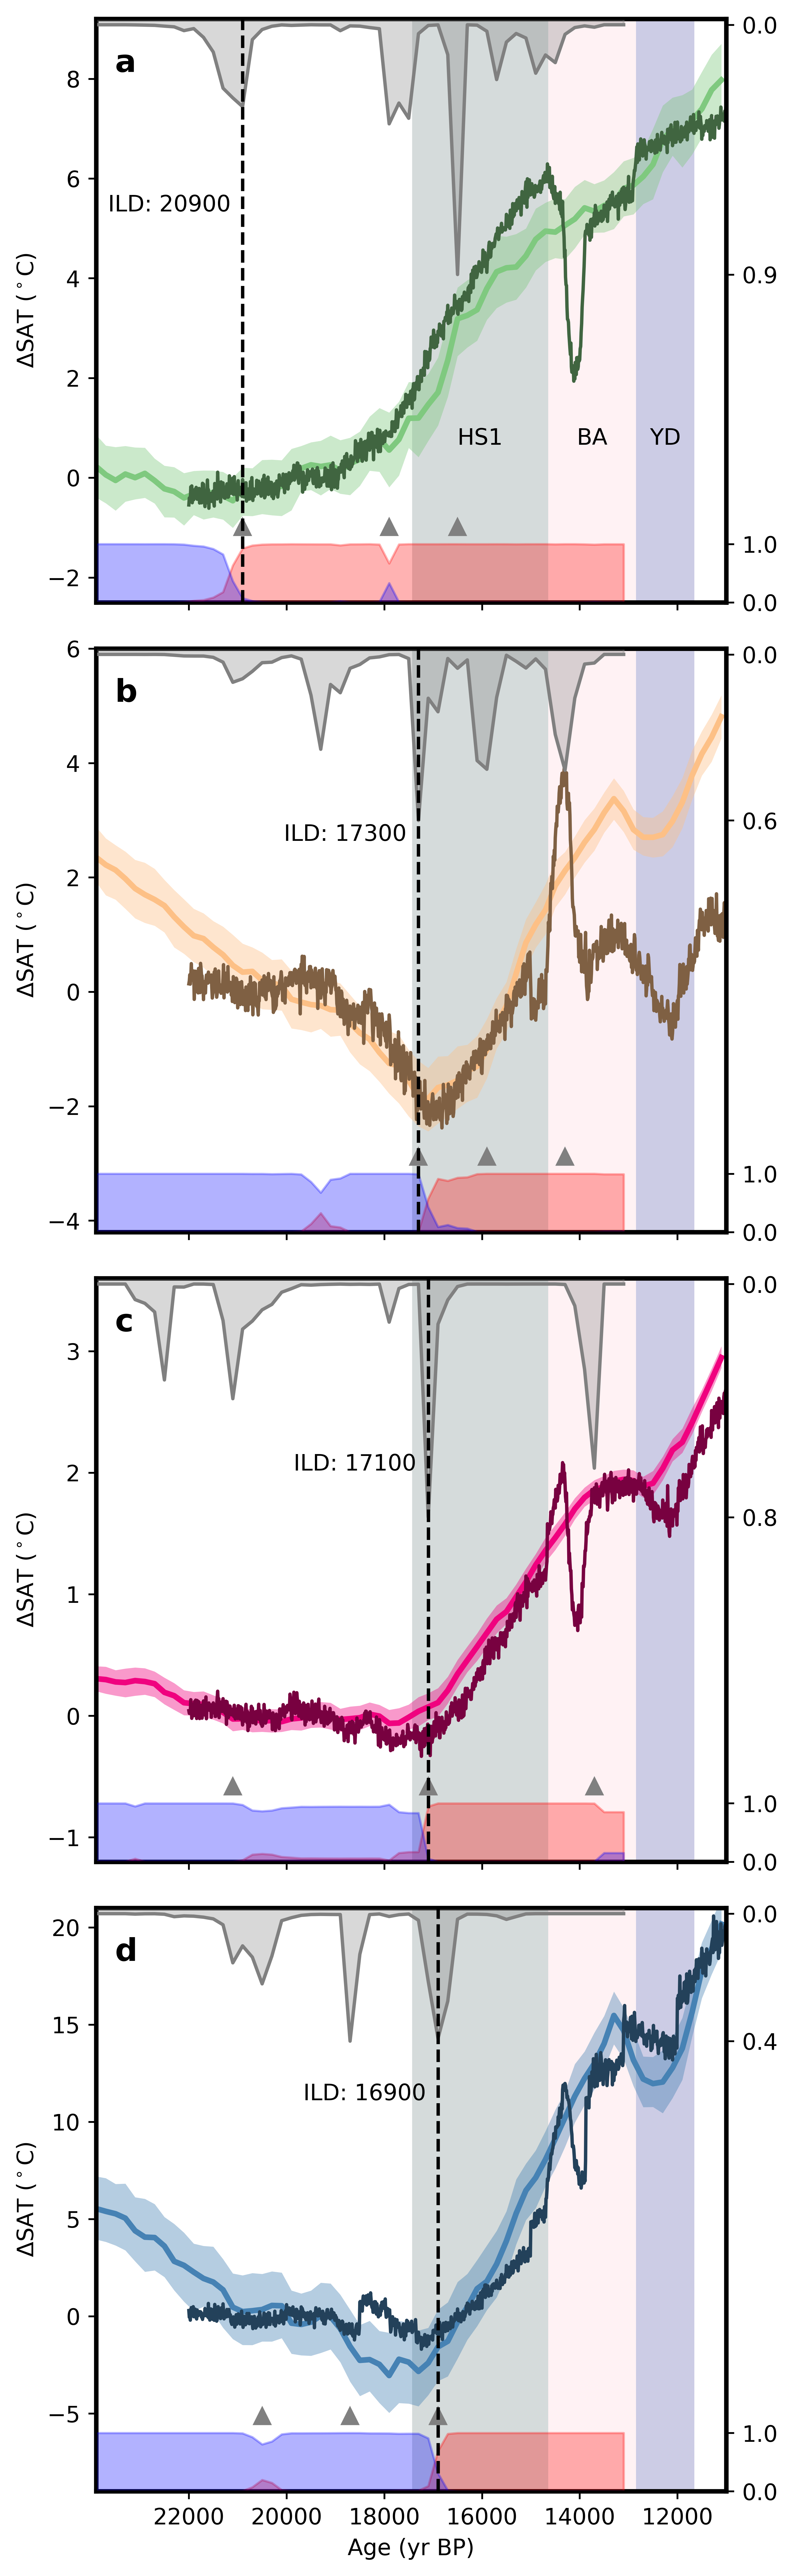

In [5]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
importlib.reload(cpf)
from matplotlib.colors import ListedColormap



# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 16),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


custom_colors_1=[(0.24901960784313726, 0.3941176470588235, 0.24901960784313726),
 (0.49607843137254903, 0.3764705882352941, 0.2627450980392157),
 (0.47058823529411764, 0.00392156862745098, 0.24901960784313726),
 (0.13725490196078433, 0.2549019607843137, 0.35294117647058826)]

# Create a ListedColormap object with your custom colors
cmap1 = ListedColormap(custom_colors_1)


# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-2.5,9.2],[-4.2,6],[-1.2,3.6],[-9,21]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_18100_21000=np.mean(data[35:55])
        data=data-data_18100_21000
        weighted_avg_curves_k[j]=data
    

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)


    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for the median of each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'].values, rb_plot=False)
    
    # Extract data for plotting from cp_info
    # data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']
    cp_age_CI=cp_info['cp_age_CI']
    cp_age_all=cp_info['cp_age_all']






    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)


    # plot triangles at x=cp_age_all and y=np.min(ax1.get_ylim())+0.2 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim()))
    ax1.plot(cp_age_all, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age_all), marker='^', markersize=7, color='grey', linestyle='None')
    # ax1.plot(cp_age, np.min(ax1.get_ylim())+0.129 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())) * np.ones_like(cp_age), marker='^', markersize=7, color='k', linestyle='None')

    if i==0:
        ax1.text(x=np.mean(HS1), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=np.min(ax1.get_ylim())+0.3 * (np.max(ax1.get_ylim())-np.min(ax1.get_ylim())), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    # ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)

    # # interpolate the ds_sat['age'], weighted_avg_curves_k_median at age=21000
    # LGMR_base=np.interp(21000, ds_sat['age'], weighted_avg_curves_k_median)
    # ax1.plot(ds_sat['age'], weighted_avg_curves_k_median-LGMR_base, color=cmap(i),linewidth=2.5)

    # calculate the mean of traces between 18000 to 22000 BP (index 0 to 400)
    TraCE_base=np.mean(TraCE_weighted_avg_LGMR_mask[i][0:401])
    # Plot TraCE data, relative to 21000 BP    
    ax1.plot(ds_trace['age'], (TraCE_weighted_avg_LGMR_mask[i]-TraCE_base)*1.5, color=cmap1(i),linewidth=1.5,linestyle='-')
    


    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('ΔSAT ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()



    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    # ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    # ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)



    # Plot the probability of the change points
    scaled_cpOccPr = (np.max(ylim)-cpOccPr*5)-0.1
    ax2.plot(age, scaled_cpOccPr, 'grey', label='cpOccPr')
    
    ax2.fill_between(age, scaled_cpOccPr, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr),np.max(scaled_cpOccPr)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr),1)), str(np.round(np.min(cpOccPr),1))])






    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age))
    ax2.text(x=cp_age+1500, y=0.7 * np.max(ax2.get_ylim()), s='ILD: '+age_text, ha='center', va='top')
    # add text to show the cp_age_CI
    age_CI_text=str(int(cp_age_CI[0]))+'-'+str(int(cp_age_CI[1]))
    # ax2.text(x=cp_age_CI[0]+800, y=0.6 * np.max(ax2.get_ylim()), s='CP CI: '+age_CI_text, ha='center', va='top')
    print('age_CI_text:',age_CI_text)

    # add a, b, c and d to the subplots
    ax1.text(x=0.03, y=0.95, s=chr(97+i), transform=ax1.transAxes, fontsize=14, fontweight='bold', va='top')

    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


In [111]:
ds_sat['age']

<xarray.DataArray 'age' (age: 65)>
array([11100., 11300., 11500., 11700., 11900., 12100., 12300., 12500., 12700.,
       12900., 13100., 13300., 13500., 13700., 13900., 14100., 14300., 14500.,
       14700., 14900., 15100., 15300., 15500., 15700., 15900., 16100., 16300.,
       16500., 16700., 16900., 17100., 17300., 17500., 17700., 17900., 18100.,
       18300., 18500., 18700., 18900., 19100., 19300., 19500., 19700., 19900.,
       20100., 20300., 20500., 20700., 20900., 21100., 21300., 21500., 21700.,
       21900., 22100., 22300., 22500., 22700., 22900., 23100., 23300., 23500.,
       23700., 23900.], dtype=float32)
Coordinates:
  * age      (age) float32 1.11e+04 1.13e+04 1.15e+04 ... 2.37e+04 2.39e+04
Attributes:
    long_name:  reconstruction bin mid-point (years BP)

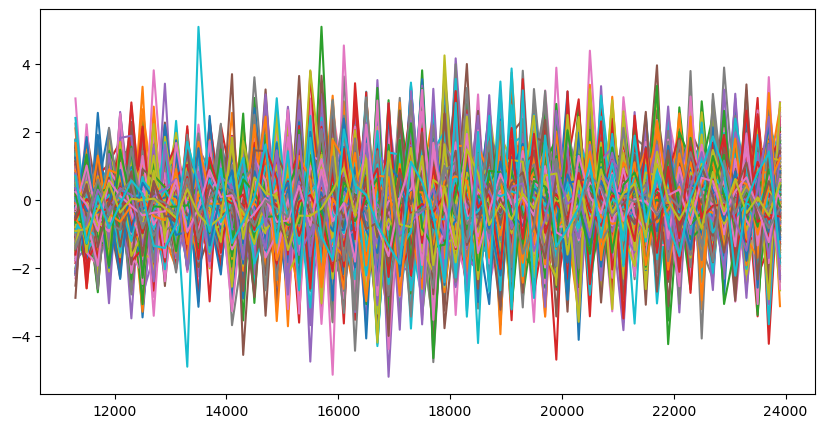

In [36]:
weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]

# create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_diff=np.diff(data)
    # plot the data_diff
    ax.plot(ds_sat['age'][1:],data_diff)

In [ ]:
for i in range(4):



    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    
    # loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
    for j in range(len(weighted_avg_curves_k)):
        data=weighted_avg_curves_k[j]
        data_diff=np.diff(data)


# Find change points and plot

find cp on all 500
on the resampled data, e.g. 10yr resolution

-Progress:100.0% done[==============================================================]
pospr_diff_max_index: 13
cps [15. 25. 32. 37. 41. 45.]
selected_cp_index: 0
\Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 23. 34. 41. 49.]
selected_cp_index: 2
|Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [14. 30. 35. 51.]
selected_cp_index: 2
/Progress:100.0% done[==============================================================]
pospr_diff_max_index: 34
cps [16. 20. 27. 35. 43.]
selected_cp_index: 3


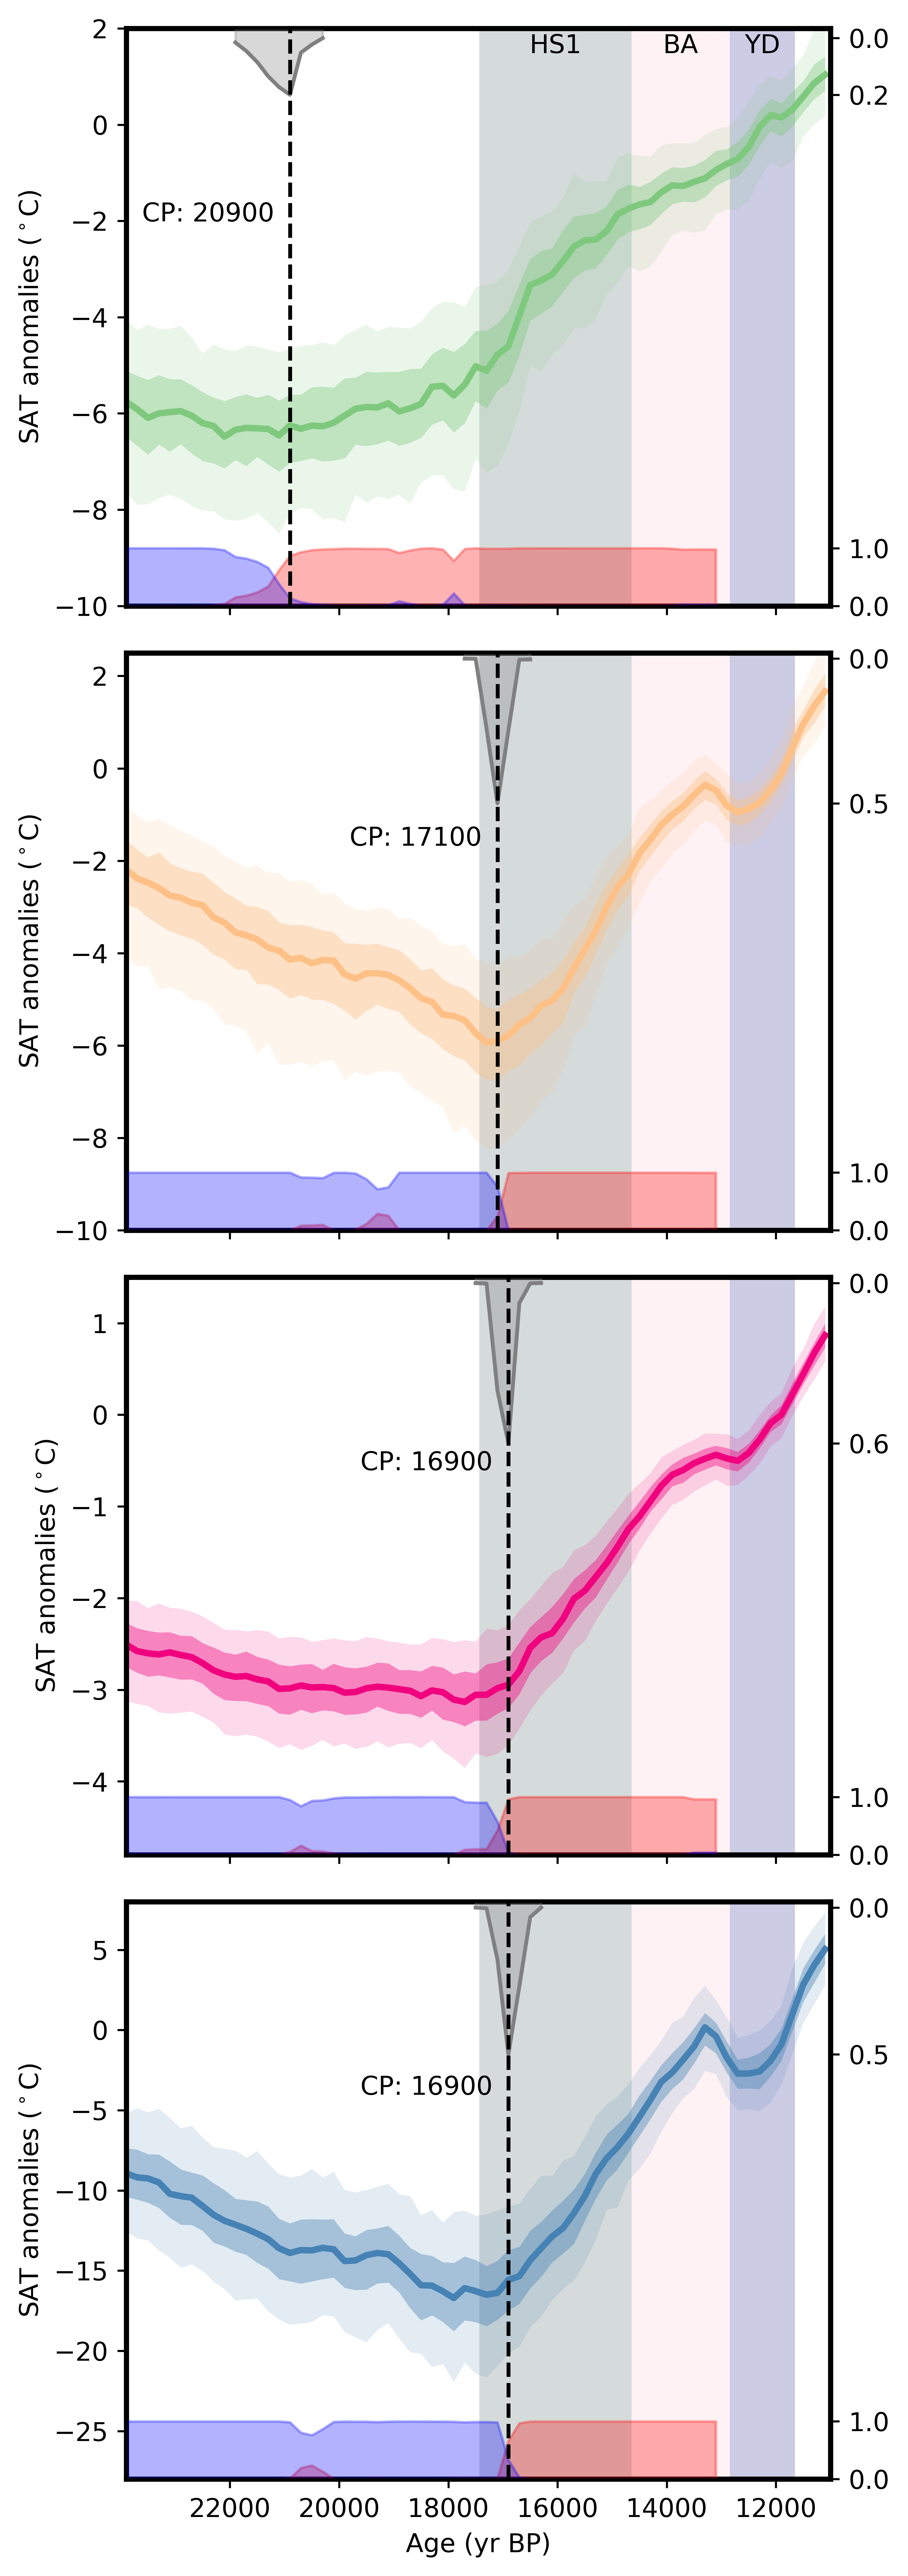

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from toolbox import change_point_functions as cpf
from matplotlib.colors import ListedColormap

# Create a figure with 4 rows and 1 column
fig, axs = plt.subplots(4, 1, figsize=(5, 14),dpi=600,sharex=True)
# cmap = plt.get_cmap('Accent', 4)

if len(all_weighted_avg_curves[0]) <= 4:
    custom_colors = [
    (0.4980392156862745, 0.788235294117647, 0.4980392156862745),
    (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
    (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
    (0.27450980392156865, 0.5098039215686274, 0.7058823529411765),]

    # Create a ListedColormap object with your custom colors
    cmap = ListedColormap(custom_colors)   
else:
    cmap = plt.get_cmap('Accent', len(all_weighted_avg_curves[0]))


left_width_all=[800,800,800,800]
right_width_all=[1100,800,800,800]

# Add climate transitions timing
HS1 = np.array([17480, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

ylims=[[-10,2],[-10,2.5],[-4.8,1.5],[-28,8]]

# Loop through the range 0 to 3
for i in range(4):

    
    # Get the current axis
    ax1 = axs[i]


    weighted_avg_curves_k = [curves[i] for curves in all_weighted_avg_curves if i in curves]

    # calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
    weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
    weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
    weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
    weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

    # calculate the median of the weighted_avg_curves_k
    weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)

    # Calculate the cp_info for each dataset
    cp_info = cpf.find_cp(weighted_avg_curves_k_median, ds_sat['age'], rb_plot=False)
    
    # Extract data for plotting from cp_info
    data_flipped = cp_info['data_flipped']
    cpOccPr = cp_info['cpOccPr']
    slpSgnPosPr = cp_info['slpSgnPosPr']
    age = cp_info['age']
    cp_age = cp_info['cp_age']


    ax1.set_ylim(ylims[i])

    # Plot grey bars for HS1, BA, and YD periods
    ax1.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0)
    ax1.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0)
    ax1.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0)

    if i==0:
        ax1.text(x=np.mean(HS1), y=0.95 * np.max(ax1.get_ylim()), s='HS1', ha='center', va='top')
        ax1.text(x=np.mean(BA), y=0.95 * np.max(ax1.get_ylim()), s='BA', ha='center', va='top')
        ax1.text(x=np.mean(YD), y=0.95 * np.max(ax1.get_ylim()), s='YD', ha='center', va='top')


    # fill the area betwen 5th and 95th percentile with light grey with alpha=0.3, hide the line
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_5th,weighted_avg_curves_k_95th,color=cmap(i),alpha=0.15,linewidth=0)

    # fill the area between 25th and 75th percentile with light blue with alpha=0.5
    ax1.fill_between(ds_sat['age'].values,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color=cmap(i),alpha=0.4,linewidth=0)



    ax1.plot(ds_sat['age'], weighted_avg_curves_k_median, color=cmap(i),linewidth=2.5)
    if i==3:
        ax1.set_xlabel('Age (yr BP)')
    # set x-axis limits
    ax1.set_xlim([11000,23900])


    # invert the x-axis
    ax1.invert_xaxis()
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('SAT anomalies ($^\circ$C)', color='k')
    
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)





    # Create a twin axis
    ax2 = ax1.twinx()
    # set the y-axis limits
    ax2.set_ylim([0, 10])
    # get the ylim
    ylim = ax2.get_ylim()

    # fill the areas under slpSgnPosPr and 1-slpSgnPosPr to light red and light blue respectively
    ax2.fill_between(age, slpSgnPosPr, color='r', alpha=0.3)
    ax2.fill_between(age, 1 - slpSgnPosPr, color='b', alpha=0.3)

    left_width=left_width_all[i]
    right_width=right_width_all[i]
    t_cutoff_left=cp_age-left_width
    t_cutoff_right=cp_age+right_width


    # Subset the age and cpOccPr arrays
    age_subset = age[(age > t_cutoff_left) & (age < t_cutoff_right)]
    cpOccPr_subset = cpOccPr[(age > t_cutoff_left) & (age < t_cutoff_right)]
    scaled_cpOccPr_subset = (np.max(ylim)-cpOccPr_subset*5)-0.1
    ax2.plot(age_subset, scaled_cpOccPr_subset, 'grey', label='cpOccPr')
    # fill the area bewteen cpOccPr_subset and max ylim with light purple
    ax2.fill_between(age_subset, scaled_cpOccPr_subset, np.max(ylim), color='grey', alpha=0.3)

    # set y ticks
    ax2.set_yticks([0, 1, np.min(scaled_cpOccPr_subset),np.max(scaled_cpOccPr_subset)])
    #  set y tick labels
    ax2.set_yticklabels(['0.0', '1.0', str(np.round(np.max(cpOccPr_subset),1)), str(np.round(np.min(cpOccPr_subset),1))])

    # plot a vertical line at cp_age
    ax2.axvline(x=cp_age, color='k', linestyle='--')
    # add text to show the cp_age
    age_text=str(int(cp_age.values))
    ax2.text(x=cp_age.values+1500, y=0.7 * np.max(ax2.get_ylim()), s='CP: '+age_text, ha='center', va='top')


    
    # Adjust layout
    plt.tight_layout()

# Display the figure
plt.show()


In [5]:
!pip install Rbeast


   ---------------------------------------- 0.0/527.8 kB ? eta -:--:--
   ------------------ --------------------- 245.8/527.8 kB 5.0 MB/s eta 0:00:01
   ------------------------------------- -- 491.5/527.8 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 527.8/527.8 kB 4.7 MB/s eta 0:00:00


# Load TraCE data

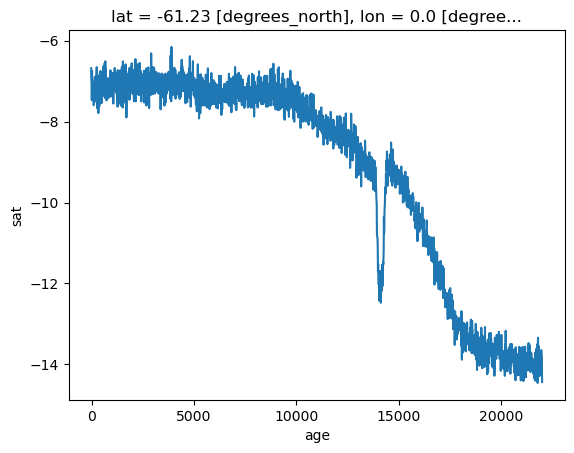

In [25]:
import xarray as xr

# import .nc data
ds = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds = ds.rename({'TREFHT': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})
# multiply age by 1000
ds['age'] = ds['age'] * -1000

# convert the sat to degrees C
ds['sat'] = ds['sat'] - 273.15

ds = ds[['sat']]

ds_trace=ds

ds_trace['sat'].isel(lat=7, lon=0).plot()


In [45]:
ds_trace

<xarray.Dataset>
Dimensions:  (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * age      (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -10.0 -20.0 -30.0
Data variables:
    sat      (age, lat, lon) float32 -57.14 -57.51 -57.91 ... -24.48 -24.36
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

In [29]:
# read the label_check
import pickle
with open('ens_ana_data/label_check_with_prob.pkl', 'rb') as f:
    label_check = pickle.load(f)

shape of the weight: (96,)
shape of the reshaped sat_centered_weighted: (2204, 13824)


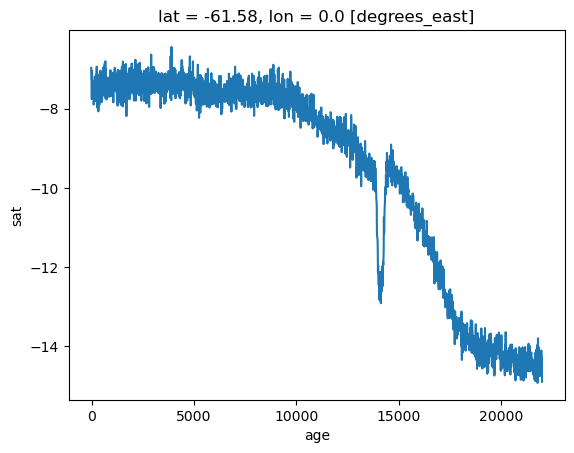

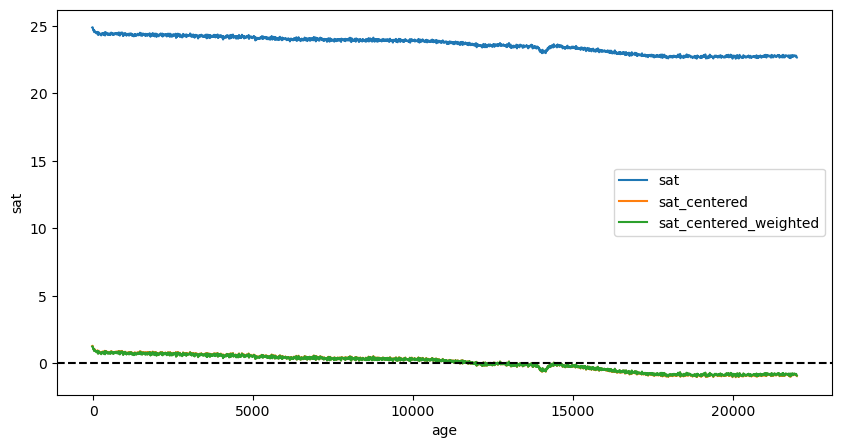

<xarray.Dataset>
Dimensions:                  (age: 2204, lat: 96, lon: 144)
Coordinates:
  * age                      (age) float64 2.2e+04 2.199e+04 ... -20.0 -30.0
  * lat                      (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                      (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
Data variables:
    sat                      (age, lat, lon) float64 nan nan nan ... nan nan nan
    class_relabeled          (lat, lon) int32 ...
    class_relabeled_checked  (lat, lon) int32 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2
    sat_centered             (age, lat, lon) float64 nan nan nan ... nan nan nan
    weight                   (lat) float32 0.0 0.03306 0.06609 ... 0.03306 0.0
    sat_centered_weighted    (age, lat, lon) float64 nan nan nan ... nan nan nan
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3

In [30]:
import xarray as xr



# Define the new grid to interpolate to (using ds_sat's grid)
new_lat = ds_sat.lat
new_lon = ds_sat.lon

# Perform the interpolation
ds_trace_interpolated = ds_trace.interp(lat=new_lat, lon=new_lon, method='linear') # there will be nan values in the interpolated data as the spatial extend of LGMR data is larger than the TraCE data
ds_trace_interpolated['class_relabeled'] = ds_sat['class_relabeled']
ds_trace_interpolated['class_relabeled_checked']=(('lat', 'lon'), label_check.reshape(96,144))

ds_trace_interpolated['sat'].isel(lat=15, lon=0).plot()


from toolbox import PCA_functions as pf
# 1. Center the Data
ds_trace_interpolated = pf.center_data(ds_trace_interpolated)

# 2. Weight the Data
ds_trace_interpolated = pf.apply_weighting(ds_trace_interpolated)

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = 40
lon_index = 90
pf.plot_sat_variables(ds_trace_interpolated, lat_index, lon_index)


ds_trace_interpolated


In [68]:
ds_trace_interpolated.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:          (age: 2204, lat: 96, lon: 144)
Coordinates:
  * age              (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -20.0 -30.0
  * lat              (lat) float32 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    sat              (age, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    class_relabeled  (lat, lon) int32 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/

# See whether the data been interpolated correctly

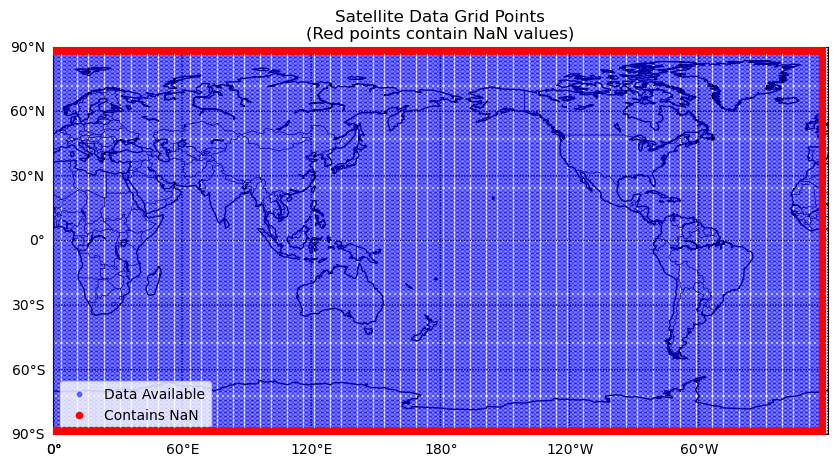

In [31]:
import xarray as xr
import numpy as np


# Check for NaN presence across the 'age' dimension
nan_presence = ds_trace_interpolated['sat'].isnull().any(dim='age')

# Check the first few values to confirm our simulation
nan_presence.isel(lat=slice(0, 5), lon=slice(0, 5))


import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set up the plot with Basemap
fig, ax = plt.subplots(figsize=(10, 6))
m = Basemap(projection='cyl', resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0, urcrnrlon=360, ax=ax)
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0., 361., 60.), labels=[0, 0, 0, 1])

# Prepare longitude and latitude data for plotting
lon2d, lat2d = np.meshgrid(ds_trace_interpolated.lon, ds_trace_interpolated.lat)

# Plot all grid points
m.scatter(lon2d.flatten(), lat2d.flatten(), color='blue', s=10, alpha=0.5, zorder=5, label='Data Available')

# Plot grid points with NaN in 'sat'
lon_nan, lat_nan = lon2d[nan_presence], lat2d[nan_presence]
m.scatter(lon_nan.flatten(), lat_nan.flatten(), color='red', s=20, alpha=1, zorder=10, label='Contains NaN')

plt.title('Satellite Data Grid Points\n(Red points contain NaN values)')
plt.legend(loc='lower left')
plt.show()


# Calculate the weighted average curve on the interpolated data

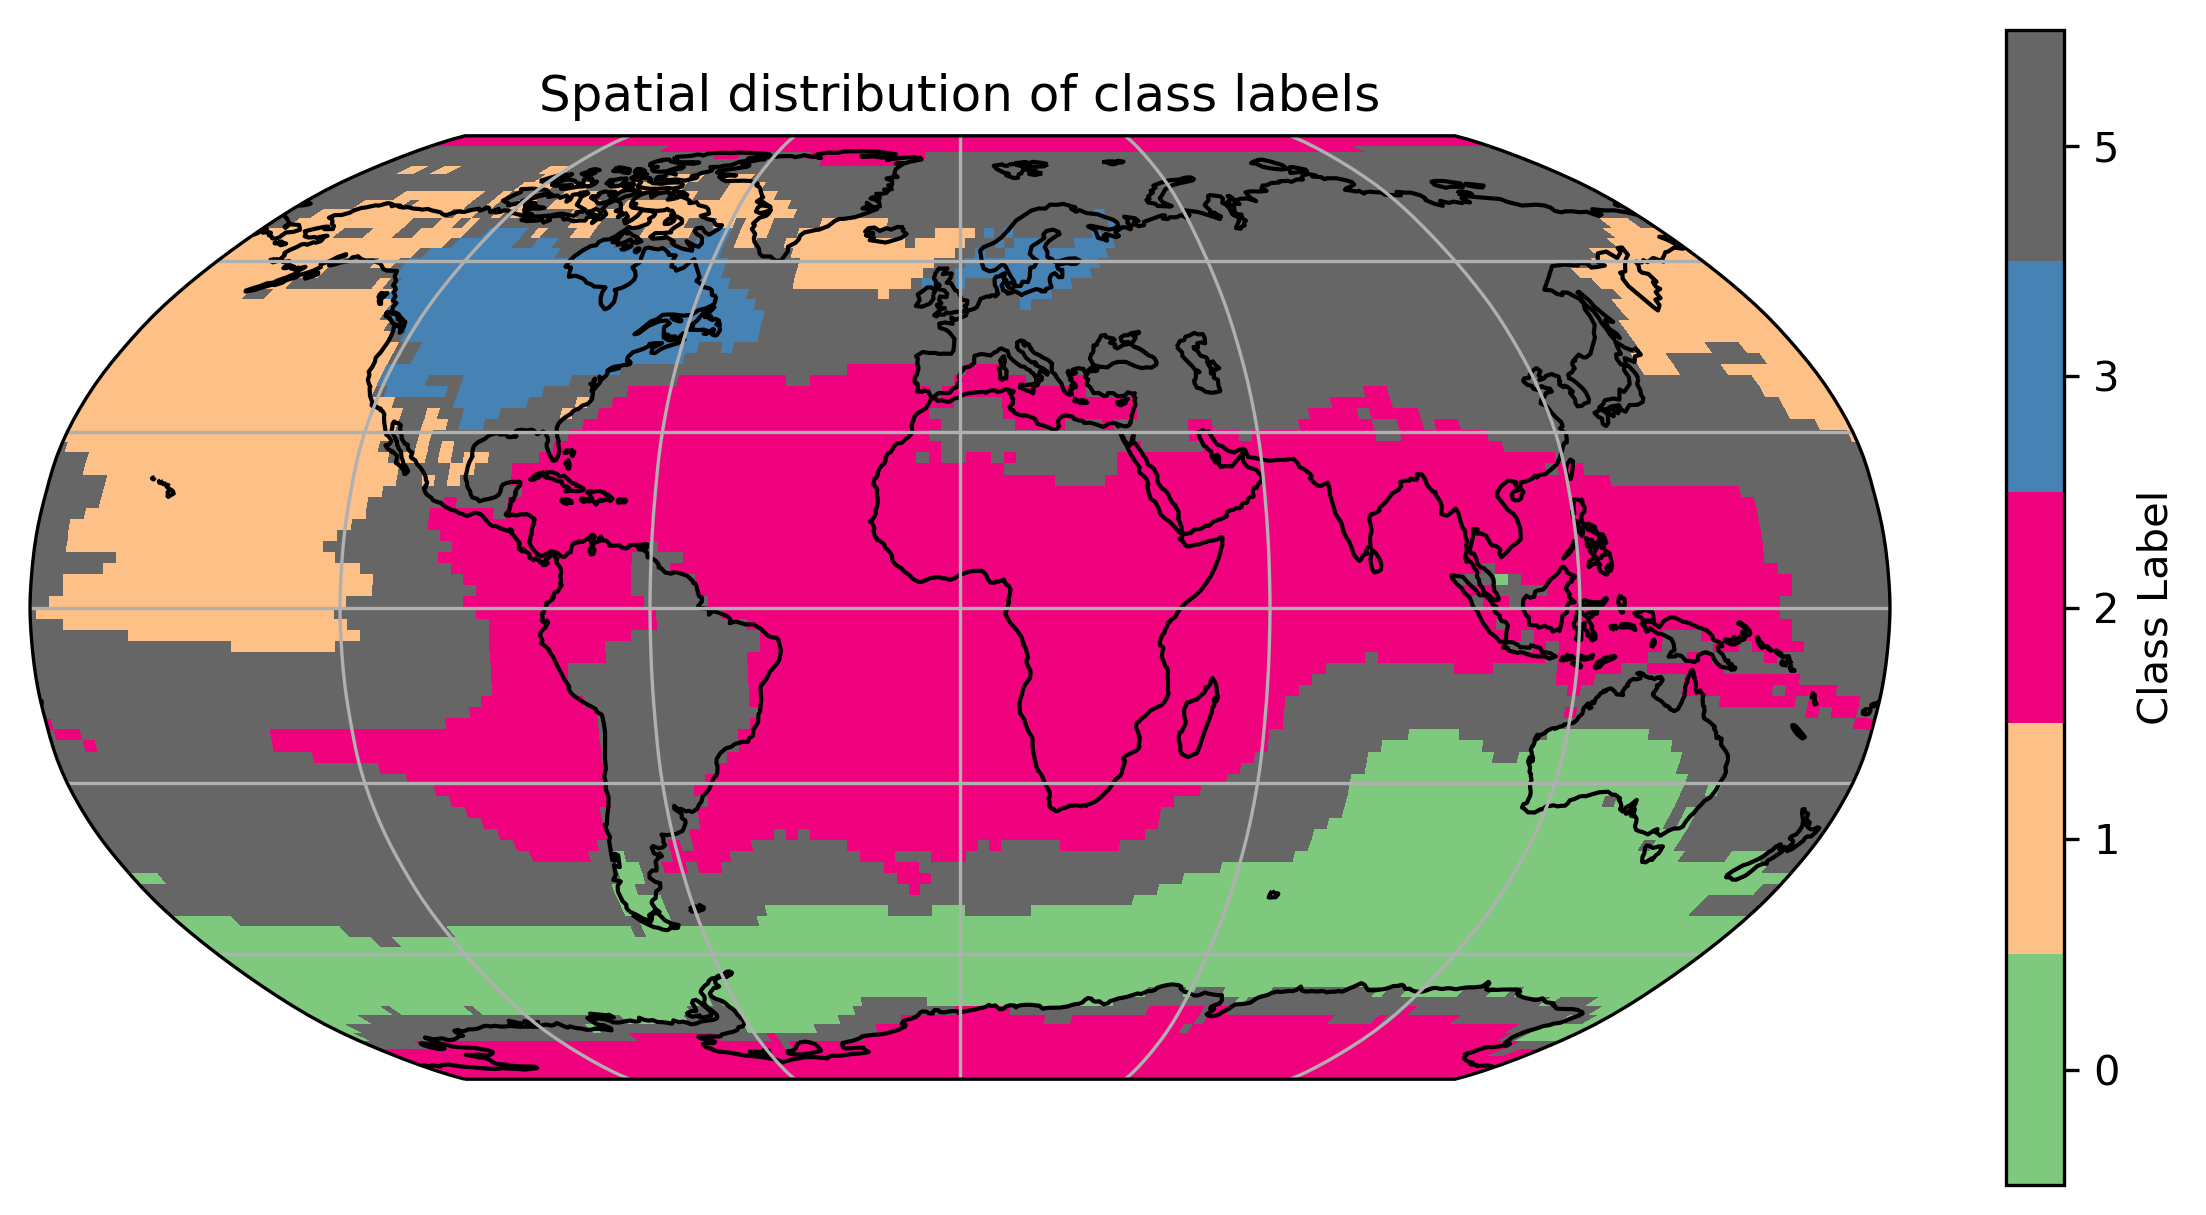

In [35]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf)

gf.plot_labels(ds_trace_interpolated,label_var_name='class_relabeled_checked')

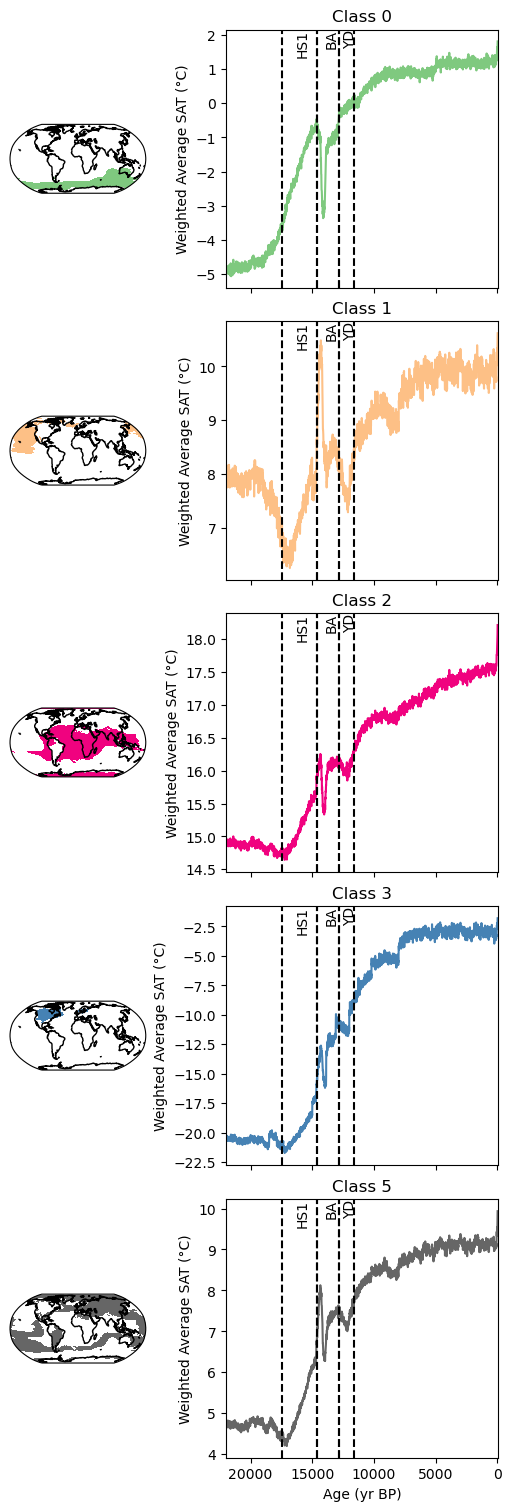

In [37]:
from toolbox import GMM_functions as gfs
import importlib
importlib.reload(gfs)

TraCE_weighted_avg_LGMR_mask=gfs.plot_weighted_average_curve(ds_trace_interpolated.copy(),label_var_name='class_relabeled_checked', dpi=100)

In [38]:
# TraCE_weighted_avg_LGMR_mask is a dict, save it to /data_fig2
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'wb') as f:
    pickle.dump(TraCE_weighted_avg_LGMR_mask, f)

In [39]:
# read the TraCE_weighted_avg_LGMR_mask.pkl
import pickle
with open('data_fig2/TraCE_weighted_avg_LGMR_mask.pkl', 'rb') as f:
    TraCE_weighted_avg_LGMR_mask = pickle.load(f)